In [2]:
import test_import
test_import.test_print()

test the importing


In [2]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy import sparse
import networkx as nx
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

# Documentation Notes and Implementation Decisions

- User is not allowed to give an initial y0 value so we are guaranteed to satisfy the conditions of Theorem 2.1
- Initial x0 value is optional and defaults to all ones.
- Maximum iterations and tolerance values are keyword arguments.
- Use vector update version because scipy sparse matrices can do matrix-vector multiplication efficiently, but with the matrix updating you're multiplying a dense matrix with a sparse matrix a LOT.

In [3]:
class simscore(object):
    """
    Calculate similarity scores between nodes in G_A and G_B using the 
    node-edge scoring method of Zager and Verghese.
    
    G_A and G_B are NetworkX graphs.
    """
    
    def __init__(self, G_A, G_B, x0 = None, tol=1e-6, maxiters=10):
        
        self.G_A = G_A
        self.G_B = G_B
        self.x0 = x0
        self.y0 = None
        self.G = None
        self.tol = tol
        self.maxiters = maxiters
        
        # Get the order and size of each graph
        n_A, m_A = G_A.number_of_nodes(), G_A.number_of_edges()
        n_B, m_B = G_B.number_of_nodes(), G_B.number_of_edges()
        
        # Get the source and terminus edge matrices 
        
    def _initialize(self):
        """
        Get initial conditions and calculate the update matrix G if
        method == 'vector'. 
        
        If x0 is not specified (that is, no initial similarity information
        is known), both x0 and y0 are initialized as all ones.
        """
            
        self.G_T = sparse.kron(self.As, self.Bs) + sparse.kron(self.At, self.Bt)
        self.G = self.G_T

        if self.x0 is None:
            self.x0 = np.ones(self.n_B*self.n_A)
            self.y0 = np.ones(self.m_B*self.m_A)

        else:
            self.y0 = self.G*self.x0
    
    def get_scores(self):
        """Get the similarity scores to given tolerance or maxiters."""
        
        self._initialize()
        self.x, self.y = self.G_T.dot(self.y0), self.G.dot(self.x0)
        
        # Eventually fix this to be tolerance based
        for i in xrange(self.maxiters):
            self.x, self.y = self.G_T.dot(self.y), self.G.dot(self.x)
    
    def display_scores(self):
        # Display both graphs (kwarg)
        # Display similarity matrix
            # or some other illuminating visualization for larger matrices
        pass

[1, 2, 3, 4]
[(1, 3), (2, 1), (2, 3), (3, 1), (3, 4), (4, 1), (4, 2)]


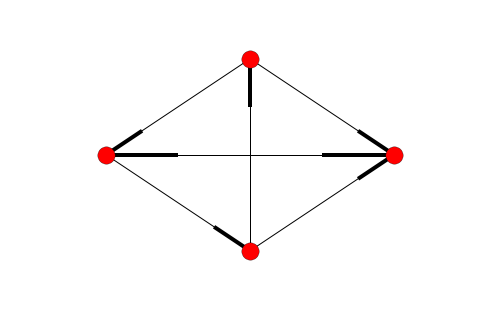

In [ ]:
G1 = nx.DiGraph()
G1.add_edges_from([(1,3),(3,1),(2,1),(2,3),(4,2),(3,4),(4,1)])
print G1.nodes()
print G1.edges()


nx.draw_shell(G1)
plt.show()

In [ ]:
G = nx.DiGraph()
G.add_edges_from([(np.random.randint(30),np.random.randint(30)) for i in xrange(500)])

G.remove_edges_from(G.selfloop_edges())

A = nx.incidence_matrix(G, oriented=True)
print A.shape

print "\n Test the addition/abs method:\n"
%timeit np.abs(A)
B = np.abs(A)
%timeit A + B
C = A + B
%timeit 0.5*C
%timeit 0.5*(A + np.abs(A))

print "\n Test the max/min method:\n"
%timeit sparse.csr_matrix((8,6))
%timeit A.maximum(sparse.csr_matrix((8,6)))
# As = positive part, At = negative part

(30, 373)

 Test the addition/abs method:

The slowest run took 4.30 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 190 µs per loop
1000 loops, best of 3: 325 µs per loop
10000 loops, best of 3: 157 µs per loop
1000 loops, best of 3: 751 µs per loop

 Test the max/min method:

10000 loops, best of 3: 157 µs per loop